In [66]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [67]:
data = pd.read_csv('C:/Users/Dell_pc/SMSSpamCollection.txt')

In [68]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [70]:
data['length'] = data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


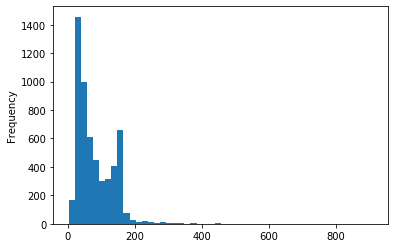

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000183A96DB320>,
      dtype=object)

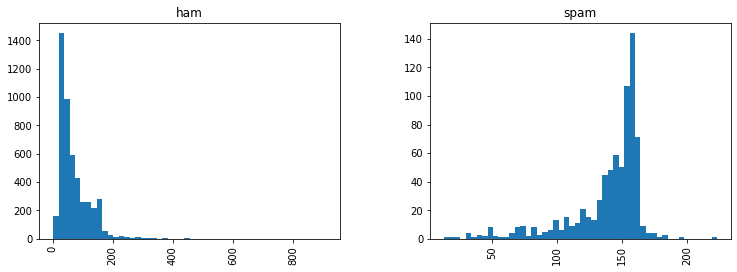

In [72]:
data.hist(column='length', by='label', bins=50,figsize=(12,4))

In [73]:
import string

In [74]:
from nltk import stem
from nltk.corpus import stopwords
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))


def pre_messages(msg):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in msg if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # converting messages to lowercase
    nopunc = nopunc.lower()
    # removing stopwords
    data_cln = [word for word in nopunc.split() if word not in stopwords]
    # using a stemmer
    data_cln = " ".join([stemmer.stem(word) for word in data_cln])

    return data_cln


    

In [75]:
data['message'] = data['message'].apply(pre_messages)
data['message'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkts 2...
3                  u dun say earli hor u c alreadi say
4            nah dont think goe usf live around though
Name: message, dtype: object

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.1, random_state = 1)
# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

C:\Users\Dell_pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
from sklearn.metrics import confusion_matrix
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[488   1]
 [ 11  58]]
